# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

C:\Users\preze\AppData\Local\Temp\ipykernel_30252\2758950845.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="viridis")


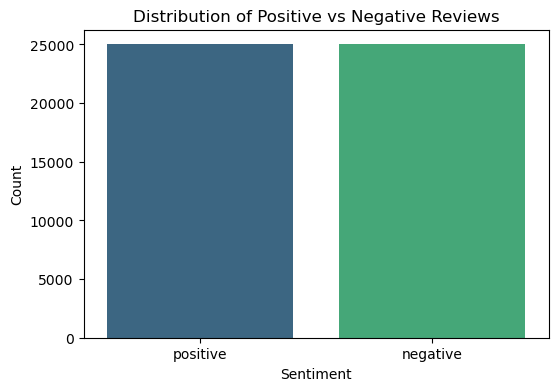

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
df = pd.read_csv("IMDB_Dataset_Cleaned.csv")

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="viridis")
plt.title("Distribution of Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

This model shows that the ratio of positive to negative reviews is incredibly even. This implies that users generally leave an equal amount of positive reviews to their negative reviews.

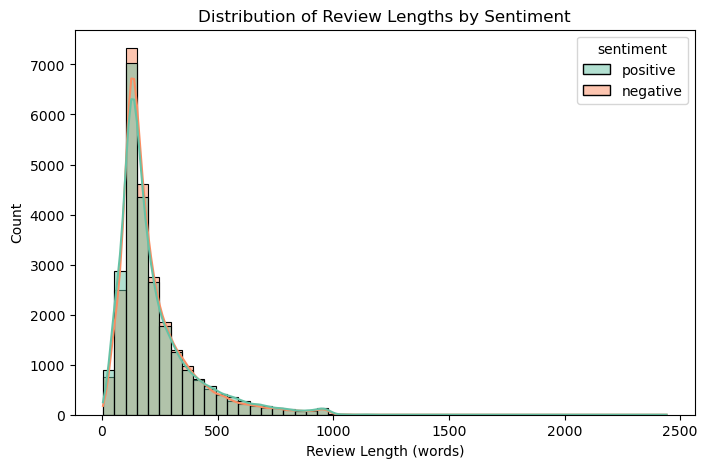

In [21]:
def tokenize(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep letters and spaces
    words = text.lower().split()
    return words

df["review_length"] = df["review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="review_length", hue="sentiment", bins=50, kde=True, palette="Set2")
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Review Length (words)")
plt.ylabel("Count")
plt.show()

This model shows that positive reviews are generally longer than negative reviews. This indicates that people who enjoyed a film are more likely to give detailed summaries of their opinions, while those who didn't enjoy a film are much more likely to be concise with their critiques. 

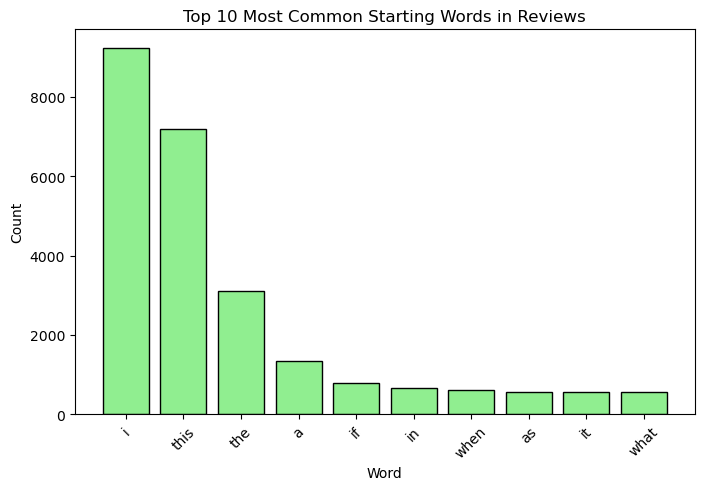

In [33]:
def get_starting_words(texts, top_n=10):
    first_words = [str(text).split()[0].lower() for text in texts if len(str(text).split()) > 0]
    return Counter(first_words).most_common(top_n)

starting_words_counts = get_starting_words(df["review"], top_n=10)
starting_words_df = pd.DataFrame(starting_words_counts, columns=["word", "count"])

plt.figure(figsize=(8,5))
plt.bar(starting_words_df["word"], starting_words_df["count"], color="lightgreen", edgecolor="black")
plt.title("Top 10 Most Common Starting Words in Reviews")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This graph shows that most people that write reviews are formatting their critiques in the first person. 